In [2]:
import pandas as pd

In [10]:
trips_7_10_weekdays_sameday = trips_7_10_weekdays[trips_7_10_weekdays['start_date'].dt.date == trips_7_10_weekdays['end_date'].dt.date]

In [12]:
%%bigquery trips_16_19_weekdays

SELECT *,
       EXTRACT(DAYOFWEEK FROM start_date) AS dow_int,
       CASE EXTRACT(DAYOFWEEK FROM start_date)
           WHEN 1 THEN "Sunday"
           WHEN 2 THEN "Monday"
           WHEN 3 THEN "Tuesday"
           WHEN 4 THEN "Wednesday"
           WHEN 5 THEN "Thursday"
           WHEN 6 THEN "Friday"
           WHEN 7 THEN "Saturday"
           END AS dow_str,
       CASE 
           WHEN EXTRACT(DAYOFWEEK FROM start_date) IN (1, 7) THEN "Weekend"
           ELSE "Weekday"
           END AS dow_weekday,
       EXTRACT(HOUR FROM start_date) AS start_hour,
       CASE 
           WHEN EXTRACT(HOUR FROM start_date) <= 5  OR EXTRACT(HOUR FROM start_date) >= 23 THEN "Nightime"
           WHEN EXTRACT(HOUR FROM start_date) >= 6 and EXTRACT(HOUR FROM start_date) <= 8 THEN "Morning"
           WHEN EXTRACT(HOUR FROM start_date) >= 9 and EXTRACT(HOUR FROM start_date) <= 10 THEN "Mid Morning"
           WHEN EXTRACT(HOUR FROM start_date) >= 11 and EXTRACT(HOUR FROM start_date) <= 13 THEN "Mid Day"
           WHEN EXTRACT(HOUR FROM start_date) >= 14 and EXTRACT(HOUR FROM start_date) <= 16 THEN "Early Afternoon"
           WHEN EXTRACT(HOUR FROM start_date) >= 17 and EXTRACT(HOUR FROM start_date) <= 19 THEN "Afternoon"
           WHEN EXTRACT(HOUR FROM start_date) >= 20 and EXTRACT(HOUR FROM start_date) <= 22 THEN "Evening"
           END AS start_hour_str
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE EXTRACT(HOUR FROM start_date) >= 16 
    and EXTRACT(HOUR FROM end_date) < 19
    and EXTRACT(DAYOFWEEK FROM start_date) != 7
    and EXTRACT(DAYOFWEEK FROM start_date) != 1
ORDER BY start_date ASC

Downloading: 100%|██████████| 266956/266956 [00:01<00:00, 142764.09rows/s]


In [13]:
trips_16_19_weekdays

,trip_id,duration_sec,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_number,zip_code,subscriber_type,dow_int,dow_str,dow_weekday,start_hour,start_hour_str
0,4687,967,2013-08-29 16:00:00+00:00,Embarcadero at Vallejo,48,2013-08-29 16:16:00+00:00,Market at Sansome,77,514,10514,Customer,5,Thursday,Weekday,16,Early Afternoon
1,4688,1047,2013-08-29 16:00:00+00:00,Spear at Folsom,49,2013-08-29 16:17:00+00:00,Civic Center BART (7th at Market),72,347,94109,Customer,5,Thursday,Weekday,16,Early Afternoon
2,4690,918,2013-08-29 16:01:00+00:00,Harry Bridges Plaza (Ferry Building),50,2013-08-29 16:16:00+00:00,Embarcadero at Sansome,60,395,77520,Customer,5,Thursday,Weekday,16,Early Afternoon
3,4689,436,2013-08-29 16:01:00+00:00,Embarcadero at Sansome,60,2013-08-29 16:08:00+00:00,Harry Bridges Plaza (Ferry Building),50,584,94965,Customer,5,Thursday,Weekday,16,Early Afternoon
4,4691,553,2013-08-29 16:01:00+00:00,Townsend at 7th,65,2013-08-29 16:11:00+00:00,San Francisco Caltrain (Townsend at 4th),70,489,94109,Customer,5,Thursday,Weekday,16,Early Afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266951,1338270,237,2016-08-31 18:47:00+00:00,Mountain View City Hall,27,2016-08-31 18:51:00+00:00,Mountain View Caltrain Station,28,66,95110,Subscriber,4,Wednesday,Weekday,18,Afternoon
266952,1338271,626,2016-08-31 18:48:00+00:00,Spear at Folsom,49,2016-08-31 18:58:00+00:00,San Francisco Caltrain 2 (330 Townsend),69,710,94402,Subscriber,4,Wednesday,Weekday,18,Afternoon
266953,1338274,461,2016-08-31 18:50:00+00:00,San Francisco Caltrain 2 (330 Townsend),69,2016-08-31 18:58:00+00:00,Powell Street BART,39,384,94597,Subscriber,4,Wednesday,Weekday,18,Afternoon
266954,1338276,468,2016-08-31 18:51:00+00:00,Temporary Transbay Terminal (Howard at Beale),55,2016-08-31 18:59:00+00:00,5th at Howard,57,19,94102,Subscriber,4,Wednesday,Weekday,18,Afternoon


In [14]:
trips_16_19_weekdays_sameday = trips_16_19_weekdays[trips_16_19_weekdays['start_date'].dt.date == trips_16_19_weekdays['end_date'].dt.date]

In [16]:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays(start='2013-01-01', end='2016-12-31')

In [19]:
non_holiday_afternoon_commute = trips_16_19_weekdays_sameday[trips_16_19_weekdays_sameday['start_date'].dt.date.isin(holidays) == False]
non_holiday_morning_commute = trips_7_10_weekdays_sameday[trips_7_10_weekdays_sameday['start_date'].dt.date.isin(holidays) == False]


/opt/conda/lib/python3.7/site-packages/pandas/core/algorithms.py:523: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  return f(comps, values)


In [23]:
non_holiday_afternoon_commute['route_name'] = non_holiday_afternoon_commute['start_station_name']+'--'+non_holiday_afternoon_commute['end_station_name']
non_holiday_morning_commute['route_name'] = non_holiday_morning_commute['start_station_name']+'--'+non_holiday_morning_commute['end_station_name']



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [35]:
morning_commutes = pd.DataFrame(non_holiday_morning_commute.groupby(['route_name']).size())
afternoon_commutes = pd.DataFrame(non_holiday_afternoon_commute.groupby(['route_name']).size())



In [49]:
morning_commutes = morning_commutes.rename(columns = {0:'Number_of_Trips'})
afternoon_commutes= afternoon_commutes.rename(columns = {0:'Number_of_Trips'})


In [50]:
morning_commutes.sort_values(['Number_of_Trips'],ascending=False).head(5)

,Number_of_Trips
route_name,
Harry Bridges Plaza (Ferry Building)--2nd at Townsend,4431
Steuart at Market--2nd at Townsend,3661
San Francisco Caltrain 2 (330 Townsend)--Townsend at 7th,3433
San Francisco Caltrain (Townsend at 4th)--Embarcadero at Folsom,3276
San Francisco Caltrain (Townsend at 4th)--Temporary Transbay Terminal (Howard at Beale),2960


In [51]:
afternoon_commutes.sort_values(['Number_of_Trips'],ascending=False).head(5)

,Number_of_Trips
route_name,
2nd at Townsend--Harry Bridges Plaza (Ferry Building),4147
Embarcadero at Folsom--San Francisco Caltrain (Townsend at 4th),3997
Embarcadero at Sansome--Steuart at Market,3802
Steuart at Market--San Francisco Caltrain (Townsend at 4th),3350
Temporary Transbay Terminal (Howard at Beale)--San Francisco Caltrain (Townsend at 4th),3300


In [5]:
%%bigquery all_trips

SELECT *,
       EXTRACT(DAYOFWEEK FROM start_date) AS dow_int,
       CASE EXTRACT(DAYOFWEEK FROM start_date)
           WHEN 1 THEN "Sunday"
           WHEN 2 THEN "Monday"
           WHEN 3 THEN "Tuesday"
           WHEN 4 THEN "Wednesday"
           WHEN 5 THEN "Thursday"
           WHEN 6 THEN "Friday"
           WHEN 7 THEN "Saturday"
           END AS dow_str,
       CASE 
           WHEN EXTRACT(DAYOFWEEK FROM start_date) IN (1, 7) THEN "Weekend"
           ELSE "Weekday"
           END AS dow_weekday,
       EXTRACT(HOUR FROM start_date) AS start_hour,
       CASE 
           WHEN EXTRACT(HOUR FROM start_date) <= 5  OR EXTRACT(HOUR FROM start_date) >= 23 THEN "Nightime"
           WHEN EXTRACT(HOUR FROM start_date) >= 6 and EXTRACT(HOUR FROM start_date) <= 8 THEN "Morning"
           WHEN EXTRACT(HOUR FROM start_date) >= 9 and EXTRACT(HOUR FROM start_date) <= 10 THEN "Mid Morning"
           WHEN EXTRACT(HOUR FROM start_date) >= 11 and EXTRACT(HOUR FROM start_date) <= 13 THEN "Mid Day"
           WHEN EXTRACT(HOUR FROM start_date) >= 14 and EXTRACT(HOUR FROM start_date) <= 16 THEN "Early Afternoon"
           WHEN EXTRACT(HOUR FROM start_date) >= 17 and EXTRACT(HOUR FROM start_date) <= 19 THEN "Afternoon"
           WHEN EXTRACT(HOUR FROM start_date) >= 20 and EXTRACT(HOUR FROM start_date) <= 22 THEN "Evening"
           END AS start_hour_str
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE EXTRACT(DAYOFWEEK FROM start_date) != 7
    and EXTRACT(DAYOFWEEK FROM start_date) != 1
ORDER BY start_date ASC

Downloading: 100%|██████████| 871994/871994 [00:03<00:00, 249354.06rows/s]


In [6]:
all_trips

,trip_id,duration_sec,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_number,zip_code,subscriber_type,dow_int,dow_str,dow_weekday,start_hour,start_hour_str
0,4069,174,2013-08-29 09:08:00+00:00,2nd at South Park,64,2013-08-29 09:11:00+00:00,2nd at South Park,64,288,94114,Subscriber,5,Thursday,Weekday,9,Mid Morning
1,4073,1067,2013-08-29 09:24:00+00:00,South Van Ness at Market,66,2013-08-29 09:42:00+00:00,San Francisco Caltrain 2 (330 Townsend),69,321,94703,Subscriber,5,Thursday,Weekday,9,Mid Morning
2,4075,1117,2013-08-29 09:24:00+00:00,South Van Ness at Market,66,2013-08-29 09:43:00+00:00,San Francisco Caltrain 2 (330 Townsend),69,316,94122,Subscriber,5,Thursday,Weekday,9,Mid Morning
3,4074,1131,2013-08-29 09:24:00+00:00,South Van Ness at Market,66,2013-08-29 09:43:00+00:00,San Francisco Caltrain 2 (330 Townsend),69,317,94115,Subscriber,5,Thursday,Weekday,9,Mid Morning
4,4076,1118,2013-08-29 09:25:00+00:00,South Van Ness at Market,66,2013-08-29 09:43:00+00:00,San Francisco Caltrain 2 (330 Townsend),69,322,94597,Subscriber,5,Thursday,Weekday,9,Mid Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871989,1338404,511,2016-08-31 23:05:00+00:00,Davis at Jackson,42,2016-08-31 23:14:00+00:00,Post at Kearny,47,370,94109,Subscriber,4,Wednesday,Weekday,23,Nightime
871990,1338406,457,2016-08-31 23:06:00+00:00,Davis at Jackson,42,2016-08-31 23:13:00+00:00,Spear at Folsom,49,504,94111,Subscriber,4,Wednesday,Weekday,23,Nightime
871991,1338405,701,2016-08-31 23:06:00+00:00,San Francisco Caltrain (Townsend at 4th),70,2016-08-31 23:17:00+00:00,Spear at Folsom,49,175,94133,Subscriber,4,Wednesday,Weekday,23,Nightime
871992,1338407,260,2016-08-31 23:09:00+00:00,Embarcadero at Bryant,54,2016-08-31 23:14:00+00:00,Steuart at Market,74,226,94114,Subscriber,4,Wednesday,Weekday,23,Nightime


In [7]:
trips_by_hr = pd.DataFrame(all_trips.groupby(['start_hour']).size())
trips_by_hr = trips_by_hr.rename(columns = {0:'Number_of_Trips'})


In [8]:
trips_over_time = pd.DataFrame(all_trips.groupby(['start_date']).size())


In [57]:
trips_by_hr

,Number_of_Trips
start_hour,
0,1696
1,797
2,420
3,427
4,1273
5,4799
6,19830
7,65900
8,128999


In [9]:
import matplotlib.pyplot as plt

from matplotlib import figure



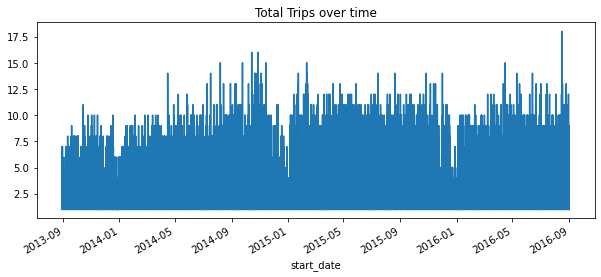

In [11]:
line_plot = trips_over_time.plot.line(figsize = (10,4),title='Total Trips over time', legend = False, )


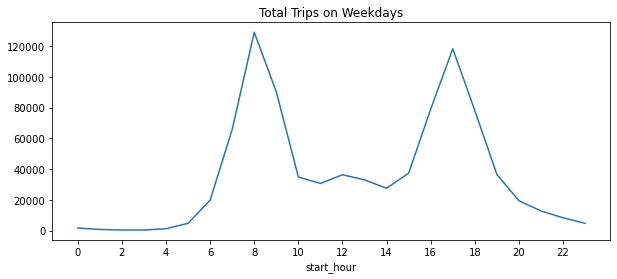

In [12]:
line_plot = trips_by_hr.plot.line(y = 'Number_of_Trips', figsize = (10,4),title='Total Trips on Weekdays', legend = False, xticks = [0,2,4,6,8,10,12,14,16,18,20,22])


In [14]:
%%bigquery all_trips_inclweekend

SELECT *,
       EXTRACT(DAYOFWEEK FROM start_date) AS dow_int,
       CASE EXTRACT(DAYOFWEEK FROM start_date)
           WHEN 1 THEN "Sunday"
           WHEN 2 THEN "Monday"
           WHEN 3 THEN "Tuesday"
           WHEN 4 THEN "Wednesday"
           WHEN 5 THEN "Thursday"
           WHEN 6 THEN "Friday"
           WHEN 7 THEN "Saturday"
           END AS dow_str,
       CASE 
           WHEN EXTRACT(DAYOFWEEK FROM start_date) IN (1, 7) THEN "Weekend"
           ELSE "Weekday"
           END AS dow_weekday,
       EXTRACT(HOUR FROM start_date) AS start_hour,
       CASE 
           WHEN EXTRACT(HOUR FROM start_date) <= 5  OR EXTRACT(HOUR FROM start_date) >= 23 THEN "Nightime"
           WHEN EXTRACT(HOUR FROM start_date) >= 6 and EXTRACT(HOUR FROM start_date) <= 8 THEN "Morning"
           WHEN EXTRACT(HOUR FROM start_date) >= 9 and EXTRACT(HOUR FROM start_date) <= 10 THEN "Mid Morning"
           WHEN EXTRACT(HOUR FROM start_date) >= 11 and EXTRACT(HOUR FROM start_date) <= 13 THEN "Mid Day"
           WHEN EXTRACT(HOUR FROM start_date) >= 14 and EXTRACT(HOUR FROM start_date) <= 16 THEN "Early Afternoon"
           WHEN EXTRACT(HOUR FROM start_date) >= 17 and EXTRACT(HOUR FROM start_date) <= 19 THEN "Afternoon"
           WHEN EXTRACT(HOUR FROM start_date) >= 20 and EXTRACT(HOUR FROM start_date) <= 22 THEN "Evening"
           END AS start_hour_str
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
ORDER BY start_date ASC

Downloading: 100%|██████████| 983648/983648 [00:02<00:00, 366874.53rows/s]


In [62]:
all_trips_inclweekend['route_name'] = all_trips_inclweekend['start_station_name']+'--'+all_trips_inclweekend['end_station_name']


In [97]:
all_trips_subscriber

NameError: name 'all_trips_subscriber' is not defined

<AxesSubplot:>

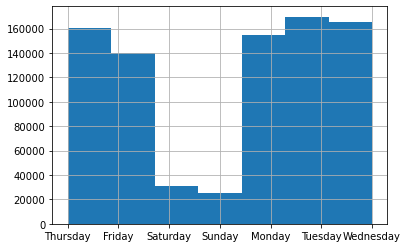

In [28]:
all_trips_subscriber.dow_str.hist(bins=7)

<AxesSubplot:>

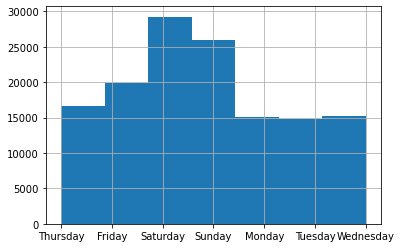

In [29]:
all_trips_customer.dow_str.hist(bins=7)

In [25]:
all_trips_customer = all_trips_inclweekend[all_trips_inclweekend['subscriber_type'] == 'Customer']
all_trips_subscriber = all_trips_inclweekend[all_trips_inclweekend['subscriber_type'] == 'Subscriber'] 

In [71]:
all_trips_inclweekend.groupby('subscriber_type')['duration_sec', 'start_hour'].median()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,duration_sec,start_hour
subscriber_type,,
Customer,1130.0,14.0
Subscriber,481.0,13.0


In [67]:
all_trips_inclweekend.groupby('subscriber_type')['dow_str', 'route_name'].apply(lambda x: x.mode().iloc[0])


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,dow_str,route_name
subscriber_type,,
Customer,Saturday,Harry Bridges Plaza (Ferry Building)--Embarcad...
Subscriber,Tuesday,San Francisco Caltrain 2 (330 Townsend)--Towns...


In [66]:
most_common_routes_dow['route_name']

subscriber_type
Customer      Harry Bridges Plaza (Ferry Building)--Embarcad...
Subscriber    San Francisco Caltrain 2 (330 Townsend)--Towns...
Name: route_name, dtype: object

In [96]:
%%bigquery trips_on_weekdays


SELECT *,
       EXTRACT(HOUR FROM start_date) AS start_hour,
       EXTRACT(DATE FROM start_date) AS start_date,
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE EXTRACT(DAYOFWEEK FROM start_date) != 7
    and EXTRACT(DAYOFWEEK FROM start_date) != 1
ORDER BY start_date ASC

Executing query with job ID: b1cfc991-cc95-4e0f-9843-9df077a56429
Query executing: 0.33s


ERROR:
 400 Column name start_date is ambiguous at [7:10]

(job ID: b1cfc991-cc95-4e0f-9843-9df077a56429)

               -----Query Job SQL Follows-----                

    |    .    |    .    |    .    |    .    |    .    |
   1:SELECT *,
   2:       EXTRACT(HOUR FROM start_date) AS start_hour,
   3:       EXTRACT(DATE FROM start_date) AS start_date,
   4:FROM `bigquery-public-data.san_francisco.bikeshare_trips`
   5:WHERE EXTRACT(DAYOFWEEK FROM start_date) != 7
   6:    and EXTRACT(DAYOFWEEK FROM start_date) != 1
   7:ORDER BY start_date ASC
    |    .    |    .    |    .    |    .    |    .    |


In [92]:
trips_on_weekdays

,trip_id,duration_sec,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_number,zip_code,subscriber_type,dow_int,start_hour
0,4069,174,2013-08-29 09:08:00+00:00,2nd at South Park,64,2013-08-29 09:11:00+00:00,2nd at South Park,64,288,94114,Subscriber,5,9
1,4073,1067,2013-08-29 09:24:00+00:00,South Van Ness at Market,66,2013-08-29 09:42:00+00:00,San Francisco Caltrain 2 (330 Townsend),69,321,94703,Subscriber,5,9
2,4075,1117,2013-08-29 09:24:00+00:00,South Van Ness at Market,66,2013-08-29 09:43:00+00:00,San Francisco Caltrain 2 (330 Townsend),69,316,94122,Subscriber,5,9
3,4074,1131,2013-08-29 09:24:00+00:00,South Van Ness at Market,66,2013-08-29 09:43:00+00:00,San Francisco Caltrain 2 (330 Townsend),69,317,94115,Subscriber,5,9
4,4076,1118,2013-08-29 09:25:00+00:00,South Van Ness at Market,66,2013-08-29 09:43:00+00:00,San Francisco Caltrain 2 (330 Townsend),69,322,94597,Subscriber,5,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
871989,1338404,511,2016-08-31 23:05:00+00:00,Davis at Jackson,42,2016-08-31 23:14:00+00:00,Post at Kearny,47,370,94109,Subscriber,4,23
871990,1338406,457,2016-08-31 23:06:00+00:00,Davis at Jackson,42,2016-08-31 23:13:00+00:00,Spear at Folsom,49,504,94111,Subscriber,4,23
871991,1338405,701,2016-08-31 23:06:00+00:00,San Francisco Caltrain (Townsend at 4th),70,2016-08-31 23:17:00+00:00,Spear at Folsom,49,175,94133,Subscriber,4,23
871992,1338407,260,2016-08-31 23:09:00+00:00,Embarcadero at Bryant,54,2016-08-31 23:14:00+00:00,Steuart at Market,74,226,94114,Subscriber,4,23
